In [45]:
#Reading all the required libraries

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("movies.csv")

In [46]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
rating= pd.read_csv("ratings.csv")
rating.shape

(100836, 4)

In [48]:
data=pd.merge(data,rating, on='movieId', how='inner')
data.shape

(100836, 6)

In [49]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [50]:
data=pd.pivot_table(data, index=['title','genres'], aggfunc='mean')
data.reset_index(level=['title','genres'],inplace=True)
data.head()

,title,genres,movieId,rating,timestamp,userId
0,'71 (2014),Action|Drama|Thriller|War,117867,4.0,1.493850e+09,610.0
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,97757,4.0,1.352671e+09,332.0
2,'Round Midnight (1986),Drama|Musical,26564,3.5,1.346507e+09,354.5
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,27751,5.0,1.342827e+09,345.0
4,'Til There Was You (1997),Drama|Romance,779,4.0,1.161440e+09,229.0


C:\Users\Nazhan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


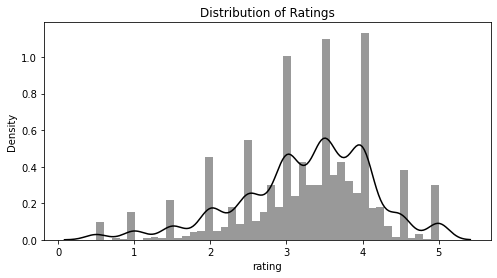

In [51]:
plt.rcParams['figure.figsize']=(8,4)
sns.distplot(data['rating'],color='black')
plt.title('Distribution of Ratings')
plt.show()

In [53]:
data['y']=data['title'].str.split(' ')
data['year']=data['y'].apply(lambda x: x[-1]) #because the releasing year is the last element

#drop the unnecessary y column from the dataset
data=data.drop(['y'], axis=1)

data['year'].value_counts()

(2002)      311
(2006)      295
(2001)      294
(2000)      283
(2007)      282
           ... 
Paterson      1
OA            1
(1922)        1
(1919)        1
One           1
Name: year, Length: 120, dtype: int64

In [54]:
#remove bracket
data['year']=data['year'].str.strip(')')
data['year']=data['year'].str.strip('(')

pd.set_option('max_rows',110)
data['year'].value_counts()

2002        311
2006        295
2001        294
2000        283
2007        282
           ... 
Watson        1
OA            1
Paterson      1
1919          1
5             1
Name: year, Length: 120, dtype: int64

In [81]:
data['year']=data['year'].replace(('2007 ', 'Despot', 'Things', '1975-1979', 'Road', ''), ('2007','2016', '2016','1979','2002', '1996'))
data['year']=data['year'].astype(int, errors='ignore')
data.head()
data['year']


0       2014
1       2004
2       1986
3       2004
4       1997
        ... 
9719    1999
9720    2002
9721    2005
9722    1986
9723    1931
Name: year, Length: 9724, dtype: object

In [82]:
print('First release year:'. data['year'].min())

AttributeError: 'str' object has no attribute 'data'